# 数据分析

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from datetime import datetime

## 载入数据

丢弃部分字段：

字段 | 分类 | 处理方式
---|---|---
ship_name | 杂讯 | 丢弃
ship_mobile | 类别特征 | 使用
order_id | 无关分析 | 丢弃
total_amount | 数值特征 | 过滤奇异值
final_amount | 重复信息 | 丢弃
pay_status | 类别特征 | 使用
ship_status | 类别特征 | 使用
is_delivery | 无识别度 | 丢弃
try_order | 无识别度 | 丢弃
erp_order_id | 数值特征 | {0, 1}
erp_status | 数值特征 | 使用
createtime | 数值特征 | 转换成日期
last_modified | 数值特征 | 转换成日期
payment | 类别特征 | 使用
shipping_id | 无识别度 | 丢弃
shipping | 类别特征 | 使用
member_id | 类别特征 | 使用
promotion_type | 类别特征 | 使用
group_id | 类别特征 | 使用
groupOn_id | 类别特征 | 使用
is_leader | 数值特征 | {0, 1}
is_prepare | 无识别度 | 丢弃
group_num | 数值特征 | {0, 3}
status | 类别特征 | 使用
confirm_delivery | 类别特征 | 使用
confirm | 无识别度 | 丢弃
ship_area | 类别特征 | 抽取区码
weight | 数值特征 | 使用
tostr | 无关分析 | 丢弃
itemnum | 数值特征 | 使用
ip | 杂讯 | 丢弃
ship_addr | 重复信息 | 丢弃
ship_zip | 无关分析 | 丢弃
ship_tel | 重复信息 | 丢弃
ship_email | 无识别度 | 丢弃
ship_time | 类别特征 | 抽取时段，重新编码
cost_item | 数值特征 | 使用
is_tax | 数值特征 | {False, True}
tax_type | 类别特征 | 使用
cost_tax | 无识别度 | 丢弃
is_protect | 无识别度 | 丢弃
cost_protect | 无识别度 | 丢弃
cost_payment | 无识别度 | 丢弃
currency | 无识别度 | 丢弃
cur_rate | 无识别度 | 丢弃
advance | 数值特征 | 忽略
score_u | 数值特征 | 忽略
score_g | 数值特征 | 忽略
discount | 数值特征 | 转成正数
pmt_goods | 数值特征 | 使用
pmt_order | 数值特征 | 使用
payed | 杂讯 | 丢弃
disabled | 无识别度 | 丢弃
displayonsite | 数值特征 | {False, True}
mark_type | 无识别度 | 丢弃
cost_freight | 数值特征 | 使用
extend | 无识别度 | 丢弃
order_refer | 无识别度 | 丢弃
addon | 杂讯 | 丢弃
source | 类别特征 | 使用
city_link | 数值特征 | {0, 1, 2}
verify_city_link | 数值特征 | {-1，0，1，2}
fuzzy | 数值特征 | {0,1}
longitude | 数值特征 | ~~剔除异常值~~ 使用
latitude | 数值特征 | ~~剔除异常值~~ 使用
scalping | 数值特征 | {False, True}
out_trade_no | 无关分析 | 丢弃
autoSendErp | 数值特征 | {False,True}
autoSendErpStatus | 类别特征 | {0, 1, 2}
string_tag_id | 杂讯 | 丢弃
lang | 类别特征 | 使用
delivery_note_price | 类别特征 | 使用

In [3]:
# 选取需要的字段
cols = ['ship_mobile', 'total_amount', 'pay_status', 'ship_status', 'erp_order_id', 'erp_status',
        'createtime', 'last_modified', 'payment', 'shipping', 'member_id', 'promotion_type',
        'group_id', 'groupOn_id', 'is_leader', 'group_num', 'status', 'confirm_delivery', 'ship_area',
        'weight', 'itemnum', 'ship_time', 'cost_item', 'is_tax', 'tax_type', 'advance',
        'score_u', 'score_g', 'discount', 'pmt_goods', 'pmt_order', 'displayonsite', 'cost_freight',
        'source', 'city_link', 'verify_city_link', 'fuzzy', 'longitude', 'latitude', 'scalping',
        'autoSendErp', 'autoSendErpStatus', 'lang', 'delivery_note_price']

df = pd.read_excel('test_data.xls', usecols=cols)
df.shape

(5881, 44)

In [4]:
df.ship_area.value_counts()

mainland:上海/上海市/浦东新区:35                    1372
mainland:上海/上海市/长宁区:26                      572
mainland:上海/上海市/徐汇区:25                      567
mainland:上海/上海市/闵行区:36                      561
mainland:上海/上海市/普陀区:28                      460
mainland:上海/上海市/黄浦区:23                      365
mainland:上海/上海市/宝山区:37                      365
mainland:上海/上海市/杨浦区:31                      351
mainland:上海/上海市/静安区:27                      316
mainland:上海/上海市/虹口区:30                      214
mainland:上海/上海市/闸北区:29                      189
mainland:上海/上海市/嘉定区:38                      142
mainland:上海/上海市/松江区:41                      139
mainland:上海/上海市/青浦区:40                      110
mainland:上海/上海市/卢湾区:24                       91
mainland:上海/上海市/金山区:44                       13
mainland:上海/上海市/奉贤区:39                       11
mainland:Shanghai/Shanghai/Jingan:27          9
mainland:Shanghai/Shanghai/Xuhui:25           8
mainland:Shanghai/Shanghai/Changning:26       7
mainland:上海/上海市/南汇区:42                  

In [5]:
areas = {23: u'黄浦区', 24: u'卢湾区', 25: u'徐汇区', 26: u'长宁区', 27: u'静安区', 28: u'普陀区', 29: u'闸北区',
         30: u'虹口区', 31: u'杨浦区', 35: u'浦东新区', 36: u'闵行区', 37: u'宝山区', 38: u'嘉定区', 39: u'奉贤区',
         40: u'青浦区', 41: u'松江区', 42: u'南汇区', 44: u'金山区', 46: u'南汇区', 48: u'奉贤区'}

def area2code(area):
    code = int(area.split(':')[-1])
    mapping = {48: 39, 46: 42}
    return mapping.get(code, code)

# 抽取区码，重新编码
#df.ship_area = df.ship_area.map(lambda area: int(area.split(':')[-1])).map({48: 39, 46: 42}.get(t, t))
df.ship_area = df.ship_area.map(area2code)

In [6]:
def time2code(t):
    mapping = {'08:00-12:00': u'上午', '14:00-18:00': u'下午', '18:00-21:00': u'晚上', '14:00-21:00': u'中午以后'}
    return mapping.get(t, '全天')

# 抽取时段，重新编码
df.ship_time = df.ship_time.fillna('??,??').map(lambda x: time2code(x.split(',')[1]))

In [7]:
# 将时间戳转换成日期
df.createtime = df.createtime.map(datetime.fromtimestamp).map(datetime.date)
df.last_modified = df.last_modified.map(datetime.fromtimestamp).map(datetime.date)

In [8]:
# 折扣：转成正数
df.discount = df.discount.map(abs)

In [9]:
df = df[df.total_amount < df.total_amount.quantile(.99)]

## 基本统计观察

### 客户

In [10]:
# 客户总数
num_mobile = len(df.ship_mobile.unique())
num_mobile

3778

In [11]:
# 常客 Top 10
df.ship_mobile.value_counts().head(10)

17166769648    23
16143545425    22
16143452034    14
17131246473    13
17188915242    13
17015859490    11
16569883485    11
16103411770    11
16140271796    11
16594905358    11
Name: ship_mobile, dtype: int64

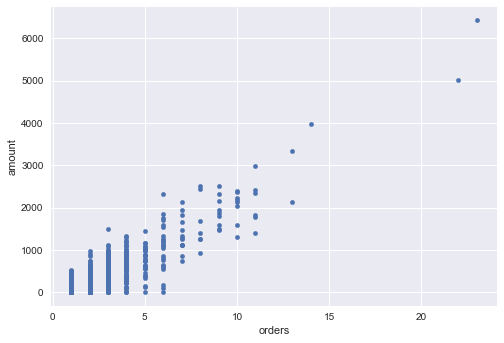

In [12]:
# 按客户分析：订单数 vs. 消费总额
df2 = df.groupby('ship_mobile')['total_amount'].agg({'orders':'count', 'amount':'sum'})
df2.plot.scatter(x='orders', y='amount')

### 消费

In [13]:
# 总营业额
df.total_amount.sum()

596657.60499999998

In [14]:
# 统计
df.total_amount.describe()

count    5821.000000
mean      102.500877
std       106.008417
min         0.000000
25%        15.800000
50%        76.000000
75%       171.020000
max       532.930000
Name: total_amount, dtype: float64

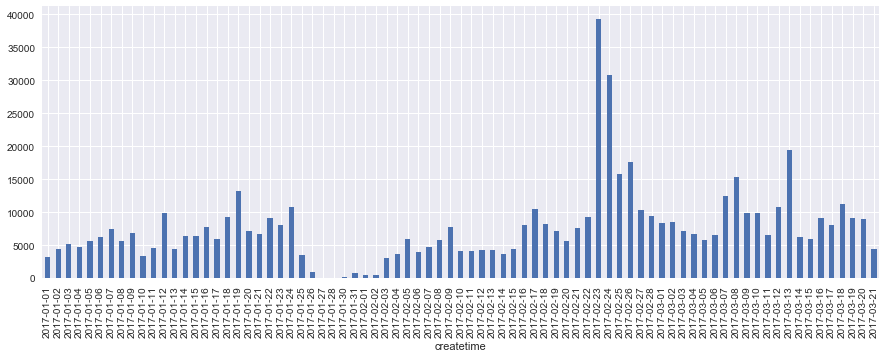

In [15]:
# 每日营业额
df.groupby('createtime')['total_amount'].sum().plot(kind='bar', figsize=(15,5))

In [16]:
# 消费 Top 10
df.groupby('ship_mobile')['total_amount'].sum().sort_values(ascending=False).head(10)

ship_mobile
17166769648    6420.86
16143545425    5002.66
16143452034    3969.50
17131246473    3332.54
16104542317    2983.37
17131310015    2519.62
16165985610    2504.15
16547276920    2441.16
17015859490    2406.81
15987152535    2393.70
Name: total_amount, dtype: float64

- 客户 17166769648 订单数23，总消费金额6420.86，绝对是VIP

In [17]:
# 常客分析
order_regular = (df.ship_mobile.value_counts() > 1)
num_regular = order_regular.sum()
print "regular ratio: %d / %d (%.2f%%)" % (num_regular, num_mobile, 100.0 * num_regular / num_mobile)

regular ratio: 1107 / 3778 (29.30%)


- 回头客比例太低

count    2671.000000
mean       64.273190
std        80.325428
min         0.000000
25%        10.000000
50%        26.000000
75%       109.000000
max       532.000000
Name: total_amount, dtype: float64


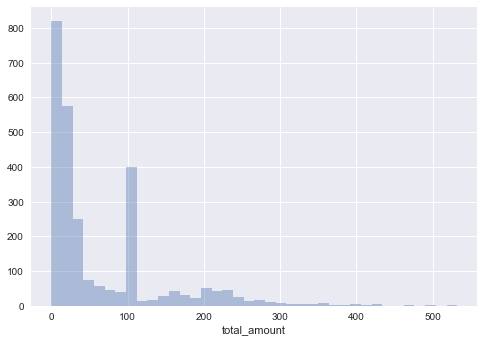

In [18]:
# 单次购买客户消费金额分布
order_once = (df.ship_mobile.value_counts() == 1)
df_order_once = df[order_once.reindex(df.ship_mobile).values]
print df_order_once.total_amount.describe()

sns.distplot(df_order_once.total_amount, kde=False)

In [19]:
# 单次购买最常出现的结账金额
df_order_once.total_amount.value_counts().head()

109.0    351
0.0      202
20.0     137
18.0      77
10.0      66
Name: total_amount, dtype: int64

- 109.0 可能是某次促销活动

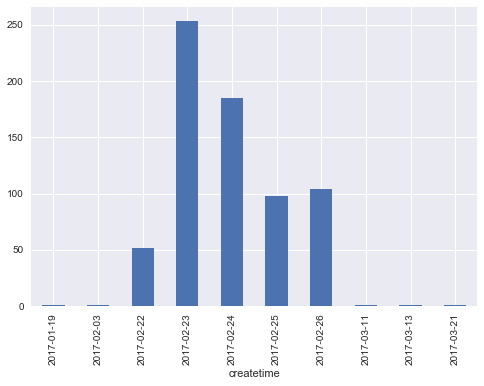

In [20]:
# 追踪消费金额109.0的客户
df_109 = df[df.total_amount == 109]

# 消费时间
df_109.groupby('createtime')['total_amount'].count().plot.bar()

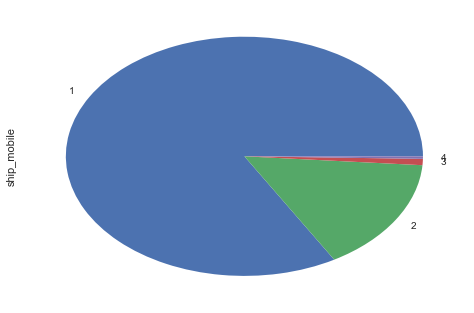

In [21]:
# 购买次数
df_109.ship_mobile.value_counts().value_counts().plot.pie()

- 貌似效果不佳 ="=

In [22]:
df.pay_status.value_counts()

1    4910
0     769
5     111
4      31
Name: pay_status, dtype: int64

### 地区

ship_area
浦东新区    1363
长宁区      572
徐汇区      565
闵行区      545
普陀区      454
Name: total_amount, dtype: int64

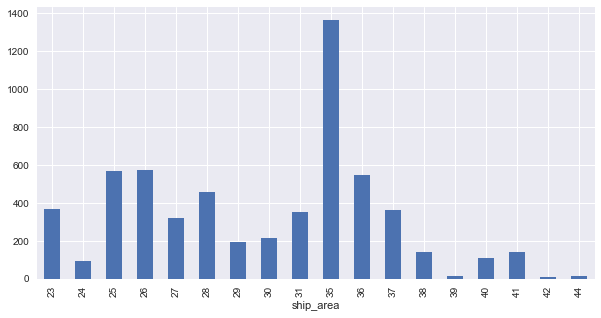

In [23]:
# 各地区消费次数
area_orders = df.groupby('ship_area')['total_amount'].count()

area_orders.plot(kind='bar', figsize=(10,5))
area_orders.sort_values(ascending=False).rename(areas).head()

ship_area
浦东新区    132584.420
长宁区      73890.910
徐汇区      59923.900
闵行区      59774.485
黄浦区      43370.770
Name: total_amount, dtype: float64

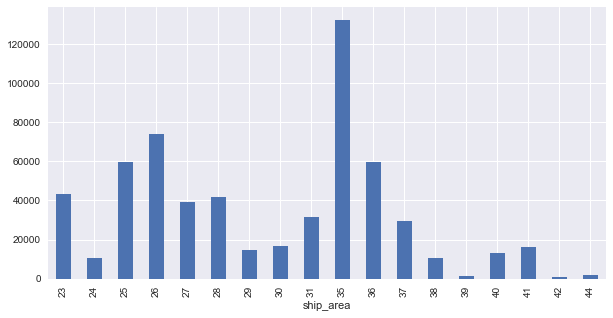

In [24]:
# 各地区消费总额
area_amount = df.groupby('ship_area')['total_amount'].sum()

area_amount.plot(kind='bar', figsize=(10,5))
area_amount.sort_values(ascending=False).rename(areas).head()

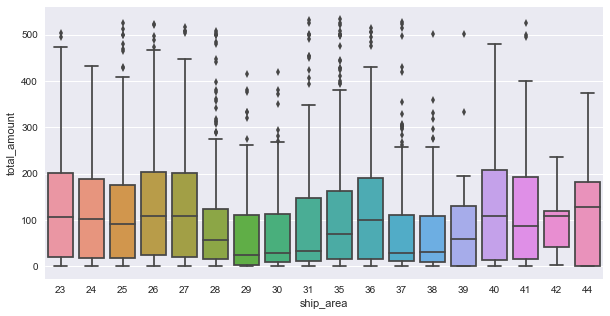

In [25]:
# 各地区消费力箱型图
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='ship_area', y='total_amount', data=df)

In [26]:
# 观察 total_amount
df.total_amount.describe()

count    5821.000000
mean      102.500877
std       106.008417
min         0.000000
25%        15.800000
50%        76.000000
75%       171.020000
max       532.930000
Name: total_amount, dtype: float64

- 平均购买金额约 110
- 购买金额差异颇大 (std=146.618477)
- 最小购买金额0， 最大购买金额 5994

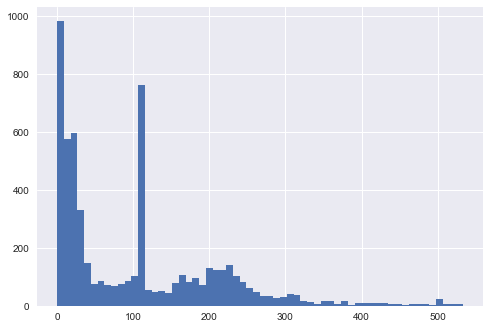

In [27]:
# 用 bar chart 观察消费分布
df.total_amount.hist(bins=60)

In [28]:
# 对消费金额分组
cats = pd.cut(df.total_amount, bins=linspace(0,6000,61)).value_counts()
cats = cats[cats != 0]
cats

(0, 100]      2694
(100, 200]    1516
(200, 300]     869
(300, 400]     193
(400, 500]      82
(500, 600]      28
Name: total_amount, dtype: int64

用 1000元 将购买行为分成两部分
- 一般消费者
- 高端消费者

In [29]:
# 一般消费者
df1 = df[df.total_amount < 1000]
df1.total_amount.describe()

count    5821.000000
mean      102.500877
std       106.008417
min         0.000000
25%        15.800000
50%        76.000000
75%       171.020000
max       532.930000
Name: total_amount, dtype: float64

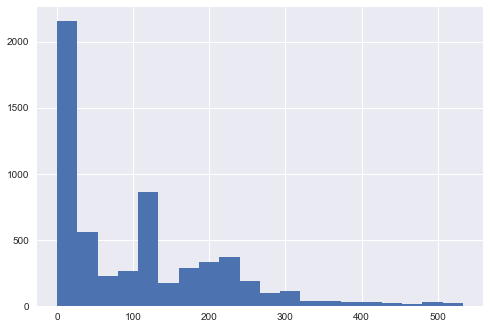

In [30]:
df1.total_amount.hist(bins=20)

In [31]:
# 发现消费金额为 0 的订单
df0 = df[df.total_amount == 0]
len(df0)

439

应该追查原因
- 为何放弃购买：价格太贵？找不到想买的？购物车设计不良？
- 那些人放弃购买：来乱的？熟客？
- 什么时间：商品缺货？竞争对手促销？
- 放弃购买时购物车里有哪些商品？
- 放弃购买的人地理分布：距离太远、运送时间太久？

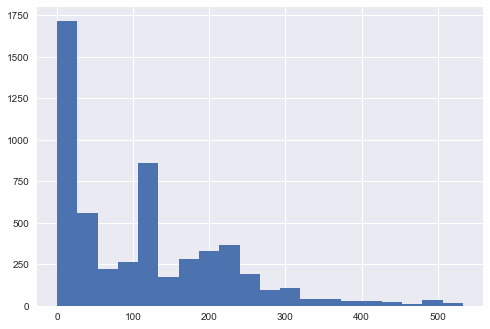

In [32]:
# 移除0元订单
df1 = df1[df1.total_amount != 0]
df1.total_amount.hist(bins=20)

In [33]:
# 观察1000元以上的订单
df2 = df[df.total_amount >= 1000]
df2.groupby('ship_mobile')['total_amount'].agg(['count','sum'])

,count,sum
ship_mobile,,


In [34]:
# 查看客户 16025631922
mobile_16025631922 = df[df.ship_mobile == 16025631922]
mobile_16025631922

,ship_mobile,total_amount,pay_status,ship_status,erp_order_id,erp_status,createtime,last_modified,payment,shipping,...,city_link,verify_city_link,fuzzy,longitude,latitude,scalping,autoSendErp,autoSendErpStatus,lang,delivery_note_price


In [35]:
100 * mobile_16025631922.total_amount.sum() / df.total_amount.sum()

0.0

虽然只下了两次单，但人家好歹也占营业额1%啊！这个“泠客戶”值得注意

In [36]:
# 发现一个有趣的现象: 好几张订单金额都是1000，呼应某种促销活动吗？
df2[df2.total_amount % 1000 == 0]

,ship_mobile,total_amount,pay_status,ship_status,erp_order_id,erp_status,createtime,last_modified,payment,shipping,...,city_link,verify_city_link,fuzzy,longitude,latitude,scalping,autoSendErp,autoSendErpStatus,lang,delivery_note_price
